## Netflix and Chill

Netflix is one of the biggest video streaming platform worldwide. In recent time the lingo *Netflix and chill* got really famous so I thought let's do some Exploratry Data Analysis(EDA) on Netlfix data and find some insights if possible. So I found some of very intresting insights let's check it out.

First thing first,so let's begin with importing pandas.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


So our dataset contains following features:
* Show_id : Show Id
* type : Movies/Series
* title : Title 
* director : Director of it
* cast : Casts of movie/series
* country : In which country it released
* date_added : On which date movie added on Netflix
* release_year : Year in which it released
* rating : Rating of movies/ series
* duration : Runtime of movie and series
* listed_in : Genre
* description : Abstract idea of movie/series


Right now we dont need null values it has void importance for us. So,Dropping Null values.

In [5]:
data.dropna(inplace=True)

## Visualization

Importing Seaborn and Matplotlib for visualising data.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

Exploratory Data Analysis on this netflix data to get some meaningfull insights. There are tons of factor we can conider but this blog contains some of basic EDA.

Let's begin with EDA process with rating.

In [7]:
ratingsdf = data['rating'].value_counts()

By doing data['ratings'].value_counts(), we are getting ratings and thier respective count in our entire dataset. This give us perfect data for ploting graph of their ratings.

In [8]:
ratingsdf.columns=['Rating','Count']
df = pd.DataFrame(ratingsdf)
df['Count'] = df['rating']
df['Rating'] = df.index
df.reset_index(inplace=True)
df.drop(['index','rating'],axis=1,inplace=True)
df

,Count,Rating
0,1189,TV-MA
1,917,TV-14
2,501,R
3,358,TV-PG
4,278,PG-13
5,176,PG
6,175,NR
7,54,TV-G
8,48,TV-Y7
9,35,G


Above shown are 14 rating criteria of Movies/Series. What we are doing here is counting there occurence and ploting them to get insight of how many movies/series belongs to particulary rating. Below is the overall representation of ratings.

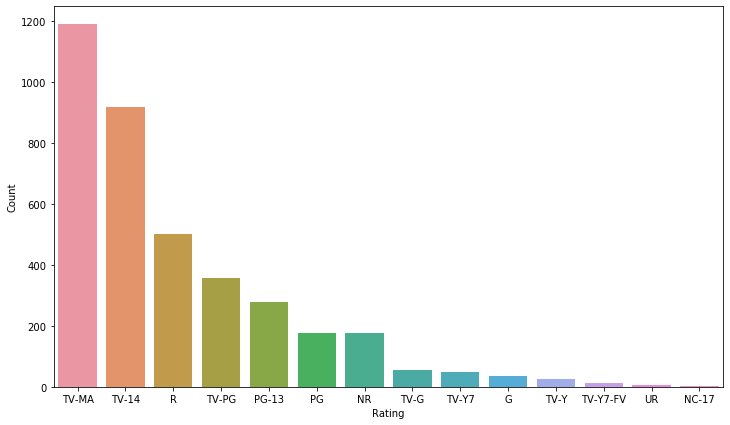

In [9]:
plt.figure(figsize=(12,7))
sns.barplot(data=df,x='Rating',y='Count')

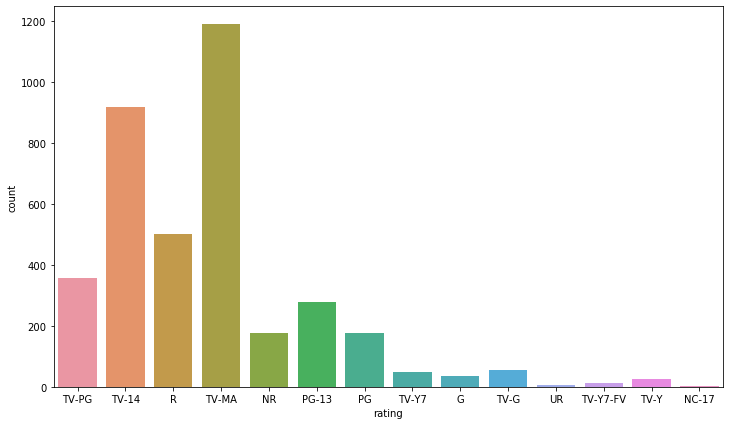

In [10]:
plt.figure(figsize=(12,7))
sns.countplot(data=data,x='rating')

In overall, most of the content is of TV-MA rating followed by TV-14.

Now, let's see how many movies belongs to each ratings.

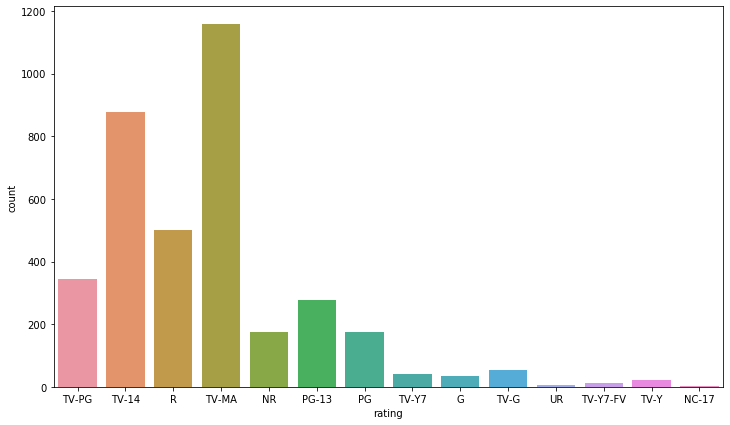

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(data=data[data['type']=='Movie'],x='rating')

Let's do this for Series

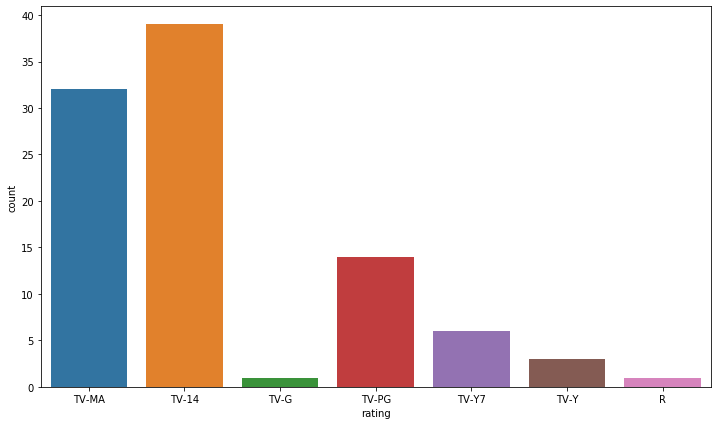

In [12]:
plt.figure(figsize=(12,7))
sns.countplot(data=data[data['type']=='TV Show'],x='rating')

In [13]:
data[data['type']=='TV Show']['rating'].unique()

array(['TV-MA', 'TV-14', 'TV-G', 'TV-PG', 'TV-Y7', 'TV-Y', 'R'],
      dtype=object)

So TV Show only have following ratings
* TV-MA
* TV-14
* TV-G
* TV-PG
* TV-Y7
* TV-Y
* R

Let's look into country wise analysis of ratings irrespective of its type.

Let's make a common function where user can pass argument like category as in feature by which they want to extract insights and argument as value they are searching for. For example :
    *Rate('country','India')* when Rate function will be called it will treat 'country' as feature and 'India' as specific value of whose data is required.

In [14]:
def Rate(cat,arg):
    plt.figure(figsize=(12,7))
    sns.countplot(data=data[data[cat]==arg],x='rating')

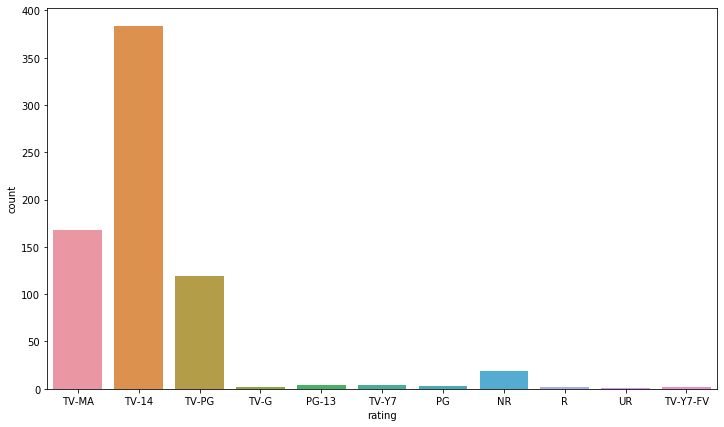

In [15]:
Rate('country','India')

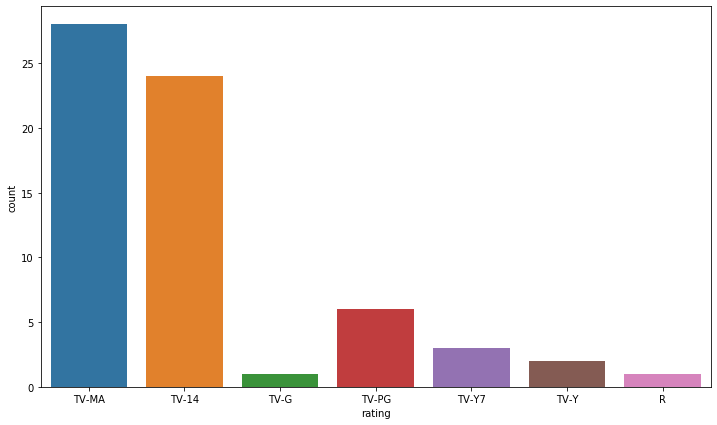

In [16]:
Rate('duration','1 Season')

Let's move forward with other features. Now will try to take some insights from listed_in feature.

So, here what we are doing is, first we are seeing its distribution with grouped genre as given in dataset.

In [17]:
listeddf = data['listed_in'].value_counts()
listeddf.columns=['listed_in','Count']
df = pd.DataFrame(listeddf)
df['Count'] = df['listed_in']
df['Listed_in'] = df.index
df.reset_index(inplace=True)
df.drop(['index','listed_in'],axis=1,inplace=True)
df

,Count,Listed_in
0,237,"Dramas, International Movies"
1,234,Stand-Up Comedy
2,184,"Dramas, Independent Movies, International Movies"
3,168,"Comedies, Dramas, International Movies"
4,136,Documentaries
...,...,...
291,1,"Cult Movies, Dramas, Independent Movies"
292,1,"International Movies, Romantic Movies, Sci-Fi ..."
293,1,"International Movies, Sports Movies"
294,1,"Action & Adventure, Cult Movies, Dramas"


Above, this table shows Listed in and its respective count. Below is its visualization.

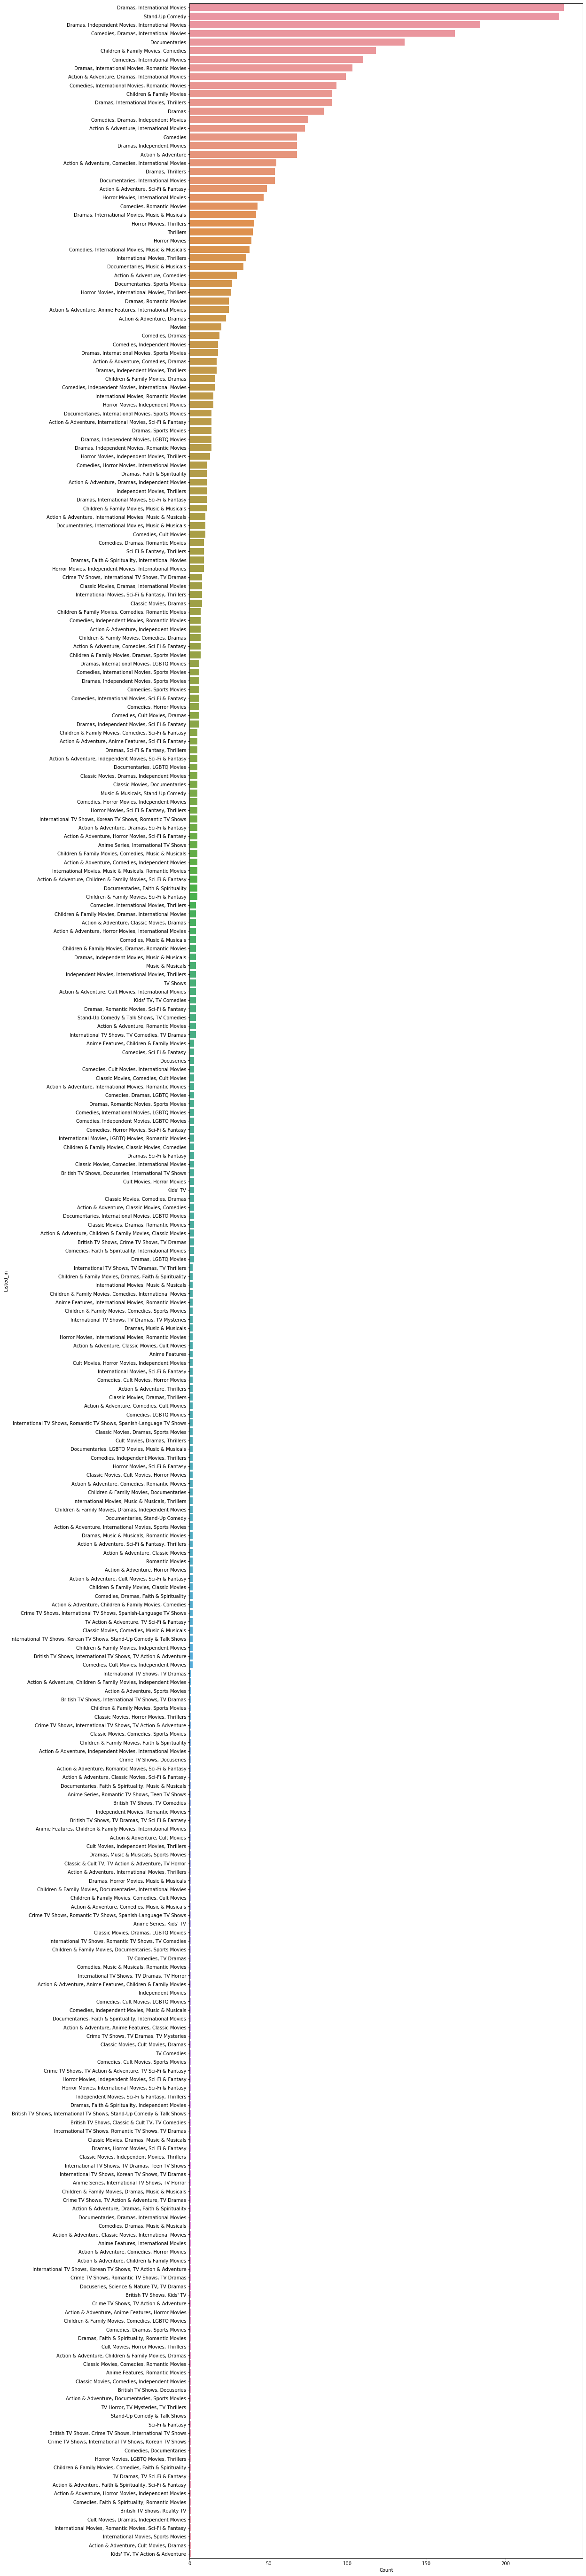

In [18]:
plt.figure(figsize=(15,100))
sns.barplot(data=df,y='Listed_in',x='Count')

We can also do these plotting with single line of code. Shown below

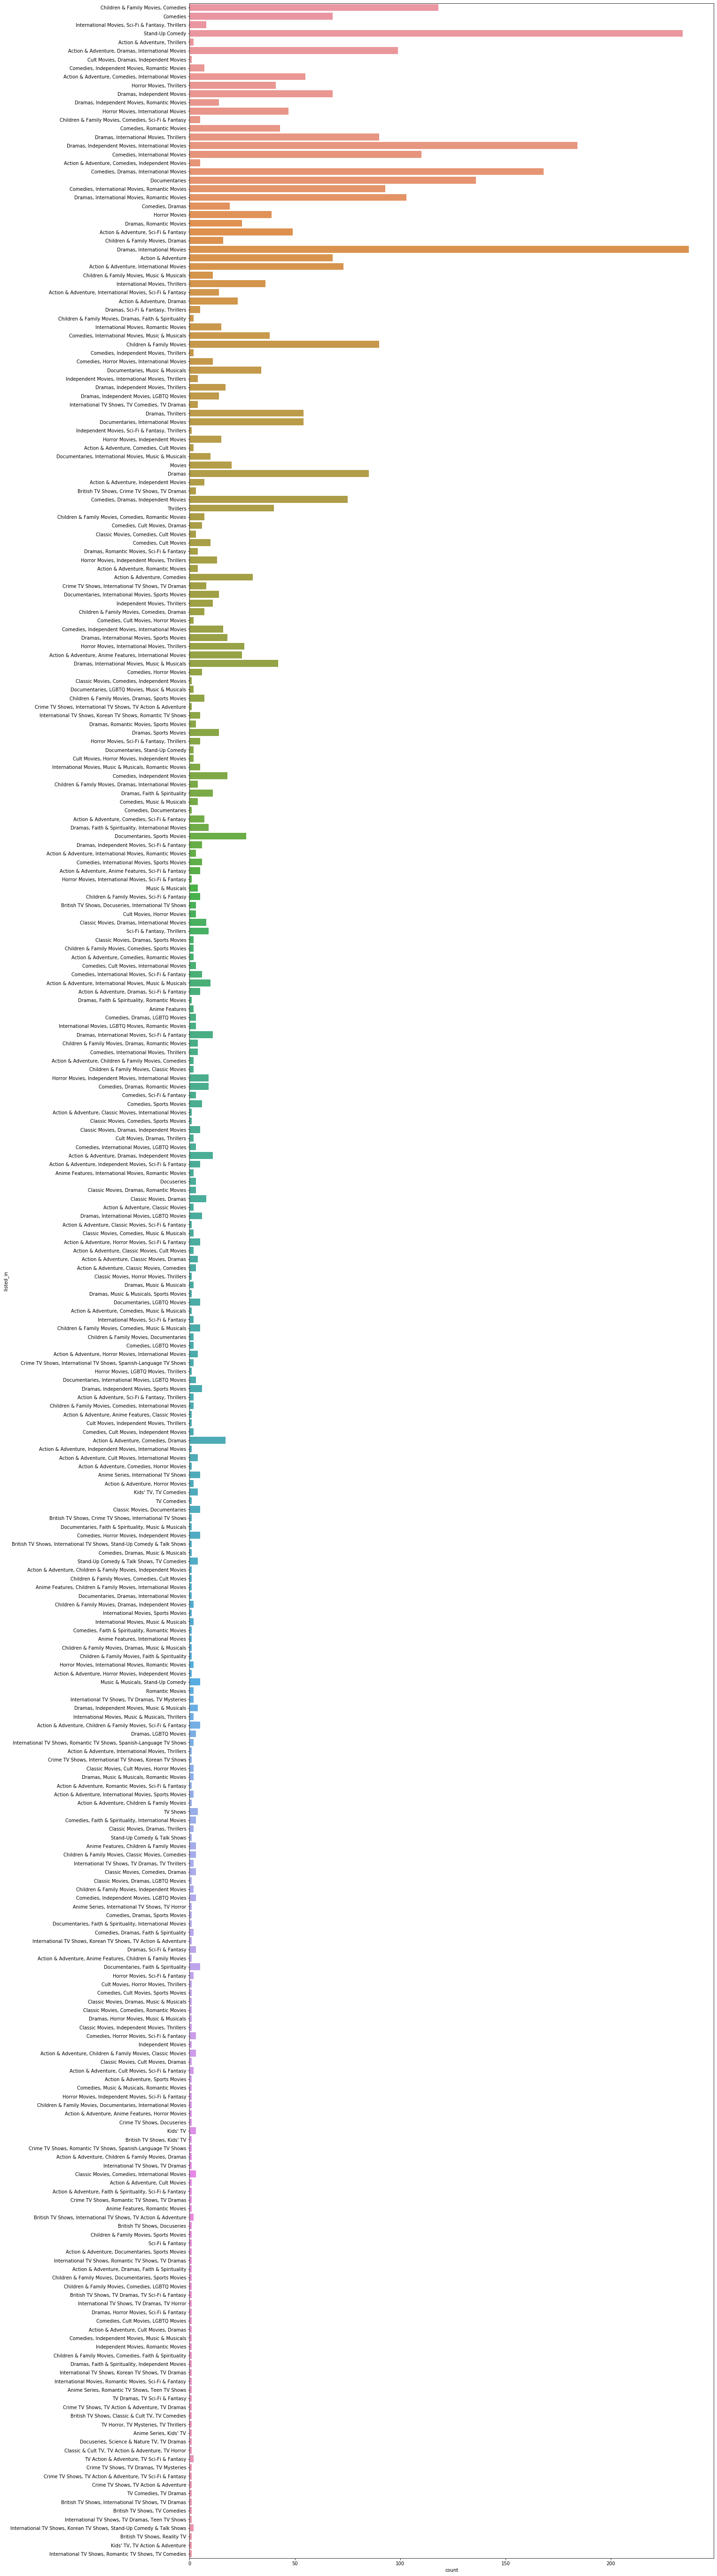

In [19]:
plt.figure(figsize=(20,100))
sns.countplot(data=data,y='listed_in')

By nature we have multiple category of same movie/series. What we can do is seperate every genre seperately and see how many movie/tv shows belong to which category.

In [20]:
lists = []
listed = data['listed_in'].str.split(',')
for li in listed:
    for l in li:
        lists.append(l)
df= pd.DataFrame(data=lists,columns=['Genre'])
df

,Genre
0,Children & Family Movies
1,Comedies
2,Comedies
3,International Movies
4,Sci-Fi & Fantasy
...,...
8360,Korean TV Shows
8361,Stand-Up Comedy & Talk Shows
8362,International TV Shows
8363,Romantic TV Shows


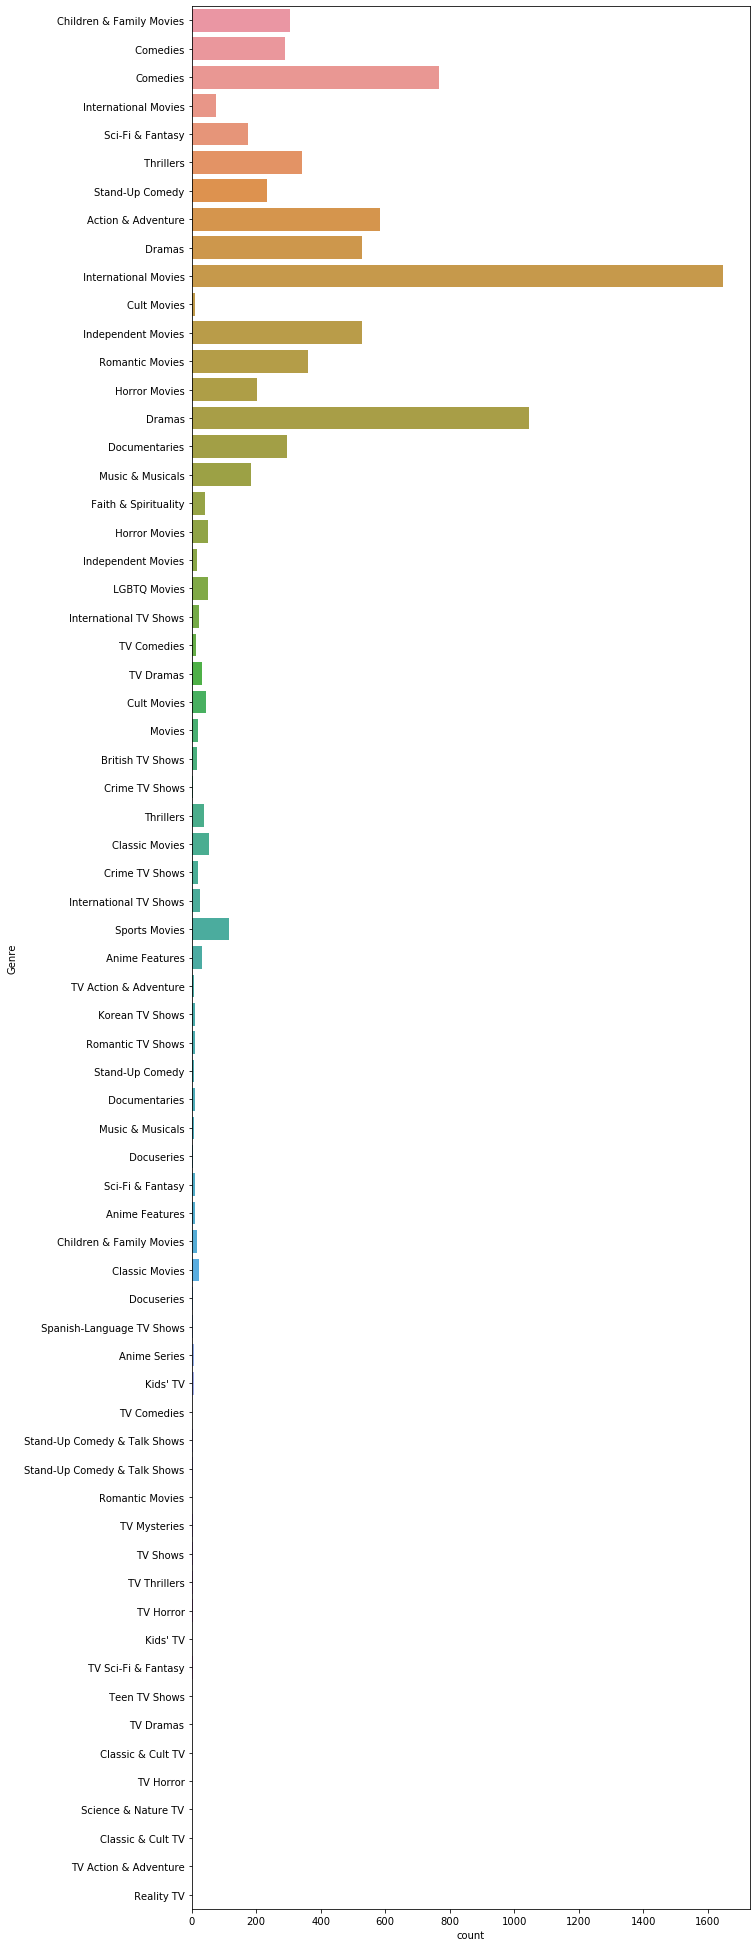

In [21]:
plt.figure(figsize=(10,35))
sns.countplot(data=df,y='Genre')

As we made a common funtion for ratings we can do the same for listed_in. With same idea and parameter.

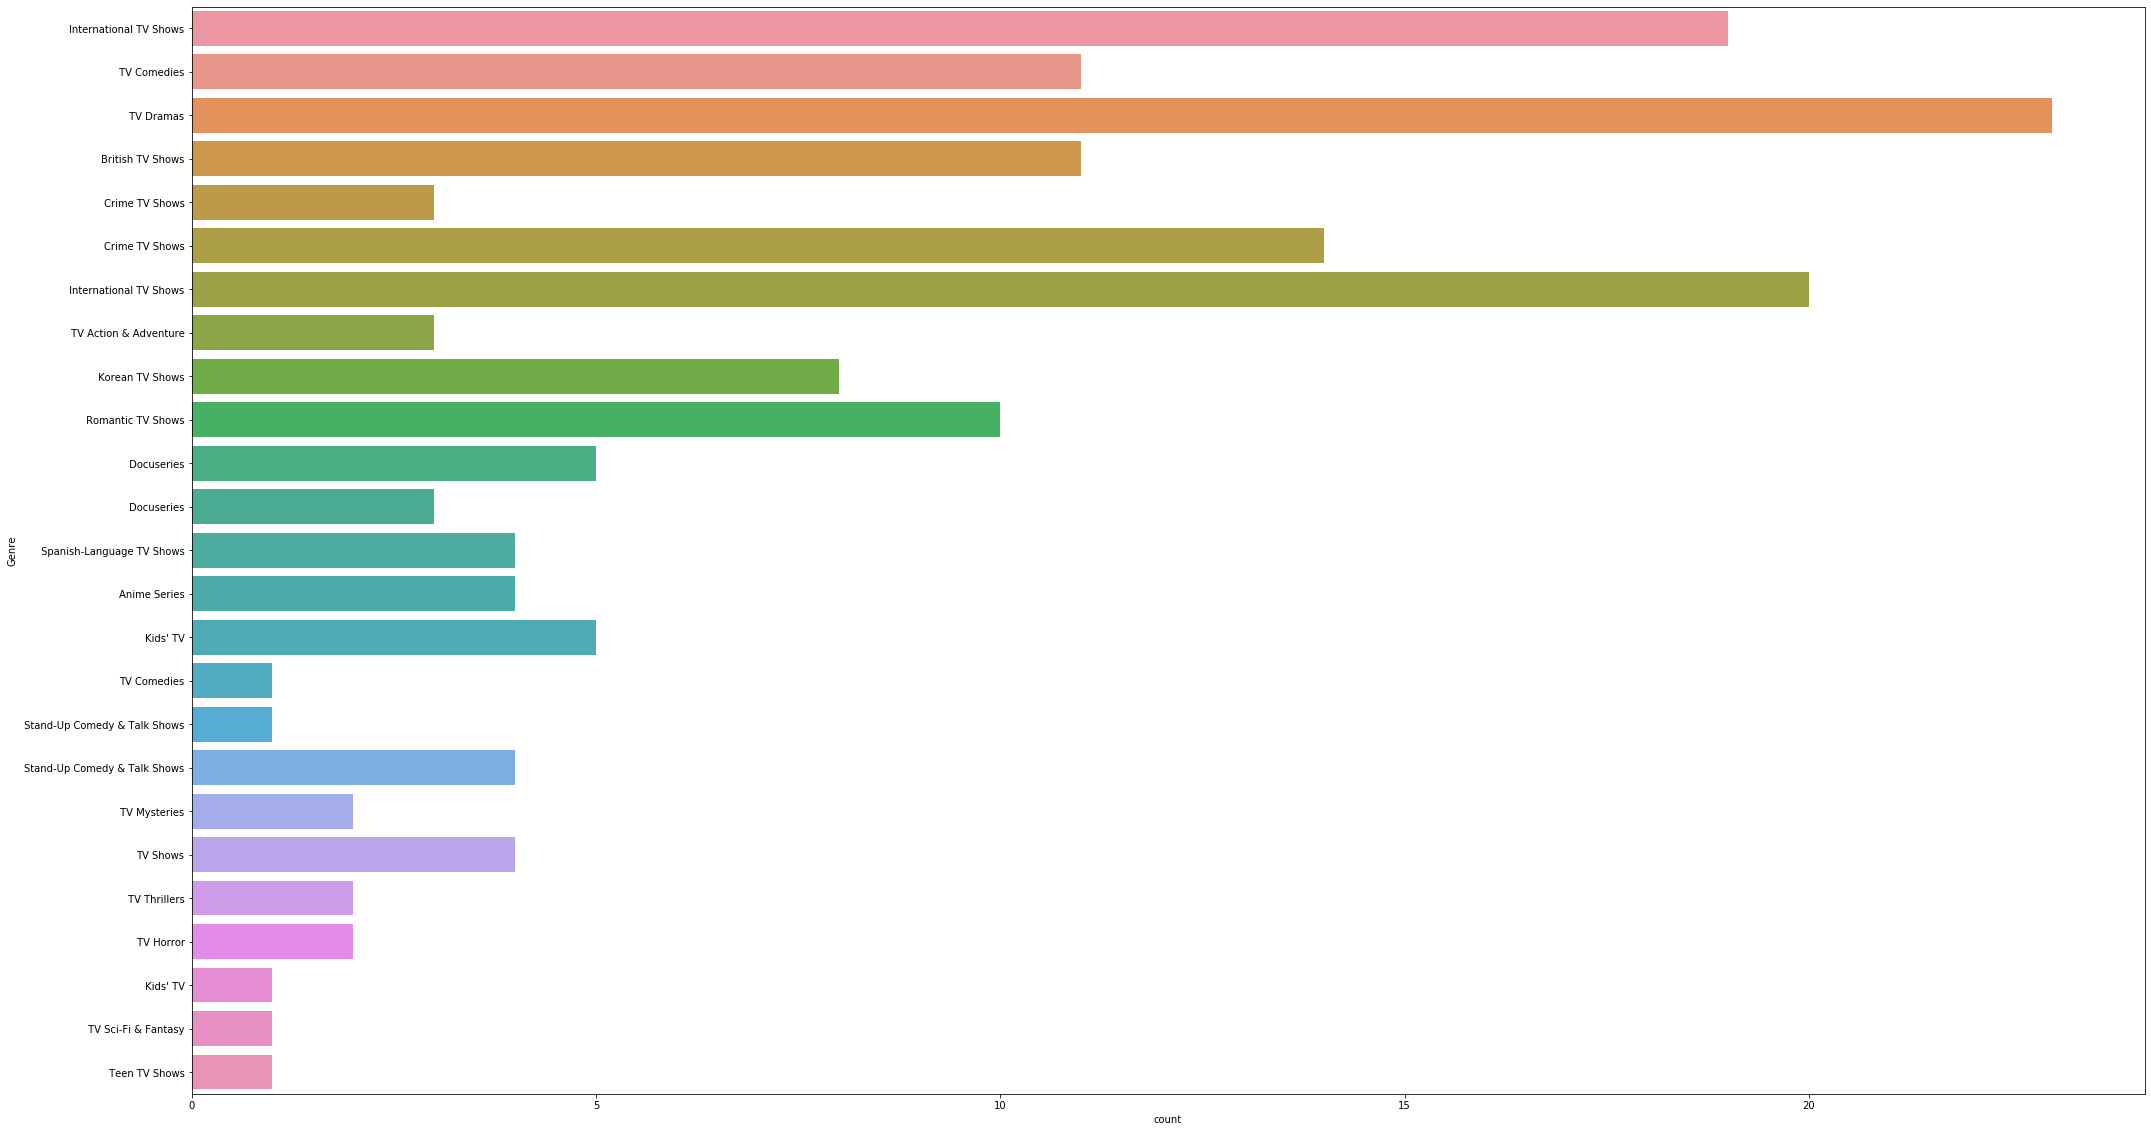

In [22]:
def Genre(cat='all',arg='all'):
    if cat == 'all' or arg=='all':
        plt.figure(figsize=(10,35))
        sns.countplot(data=df,y='Genre')
    else:
        lists = []
        listed = data[data[cat]==arg]['listed_in'].str.split(',')
        for li in listed:
            for l in li:
                lists.append(l)
        df= pd.DataFrame(data=lists,columns=['Genre'])
        df
        plt.figure(figsize=(35,20))
        sns.countplot(data=df,y='Genre')
Genre('duration','1 Season')

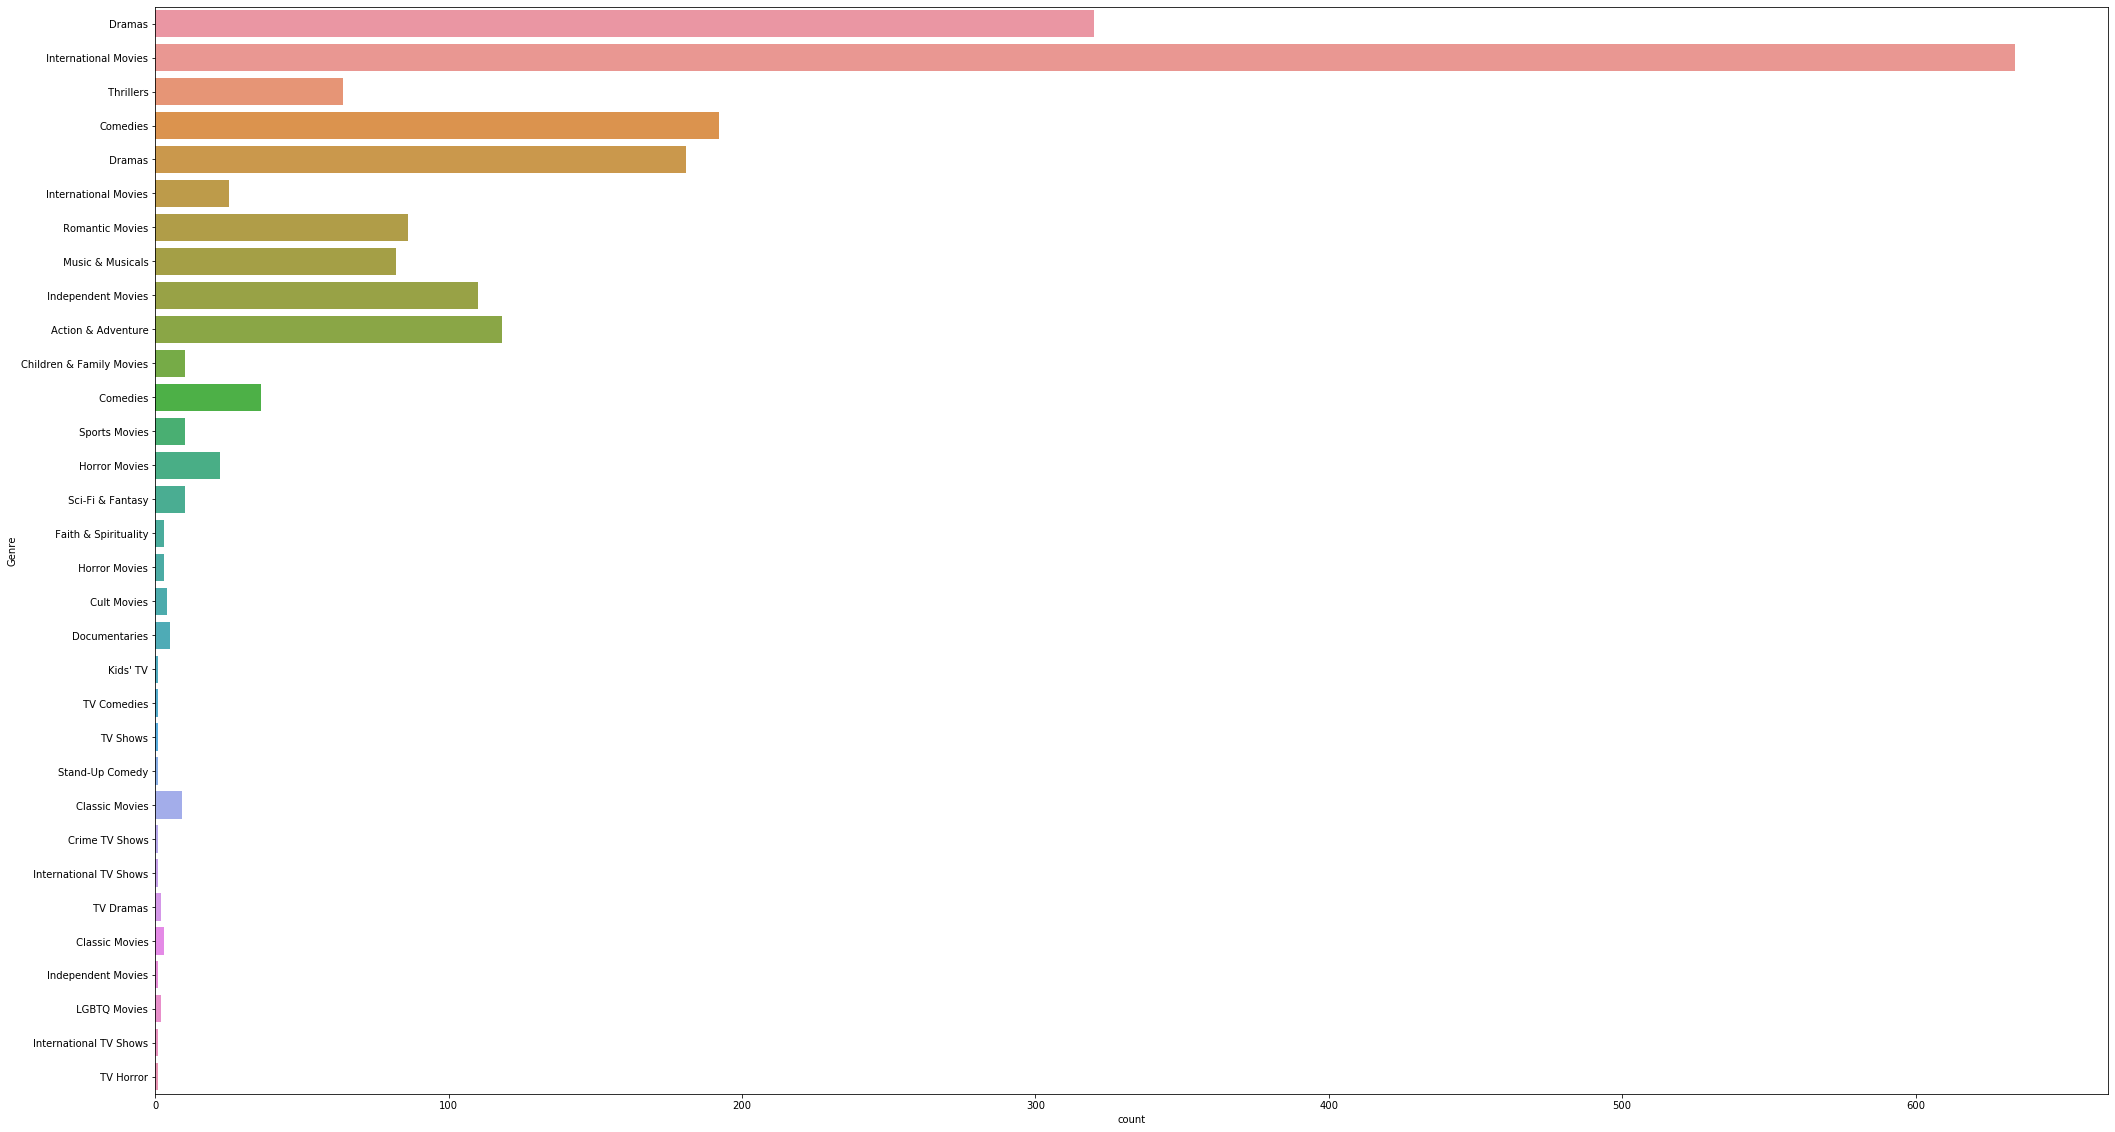

In [23]:
Genre('country','India')

Now let's move forward with release_year. This feature basically tells us about when does this content was released in. We will follow same process as we did above.

In [24]:
df = data['release_year'].value_counts()
df = pd.DataFrame(df)
df['Release_year'] = df.index
df['Count'] = df['release_year']
df.reset_index(inplace=True)
df.drop(['index','release_year'],inplace=True,axis=1)
df

,Release_year,Count
0,2017,585
1,2018,537
2,2016,514
3,2019,326
4,2015,324
...,...,...
64,1956,1
65,1954,1
66,1945,1
67,1944,1


This table represent Release_year with its number of releases.

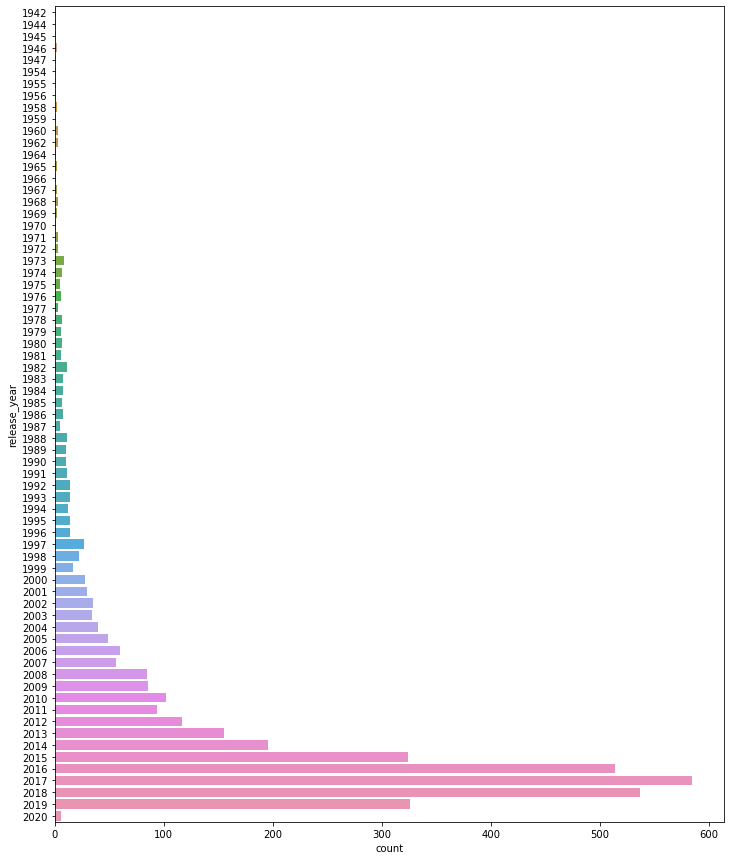

In [25]:
plt.figure(figsize=(12,15))
sns.countplot(data=data,y='release_year')

2017 has the highest number of releases followd by 2016 and 2018

Let's make same common function for it.

In [26]:
def Year(cat='all',arg='all'):
    if cat =='all' or arg=='all':
        plt.figure(figsize=(12,15))
        sns.countplot(data=data,y='release_year')
    else:
        df = data[data[cat]==arg]['release_year'].value_counts()
        df = pd.DataFrame(df)
        df['Release_year'] = df.index
        df['Count'] = df['release_year']
        df.reset_index(inplace=True)
        df.drop(['index','release_year'],inplace=True,axis=1)
        df
        plt.figure(figsize=(30,15))
        sns.barplot(data=df,x='Release_year',y='Count')

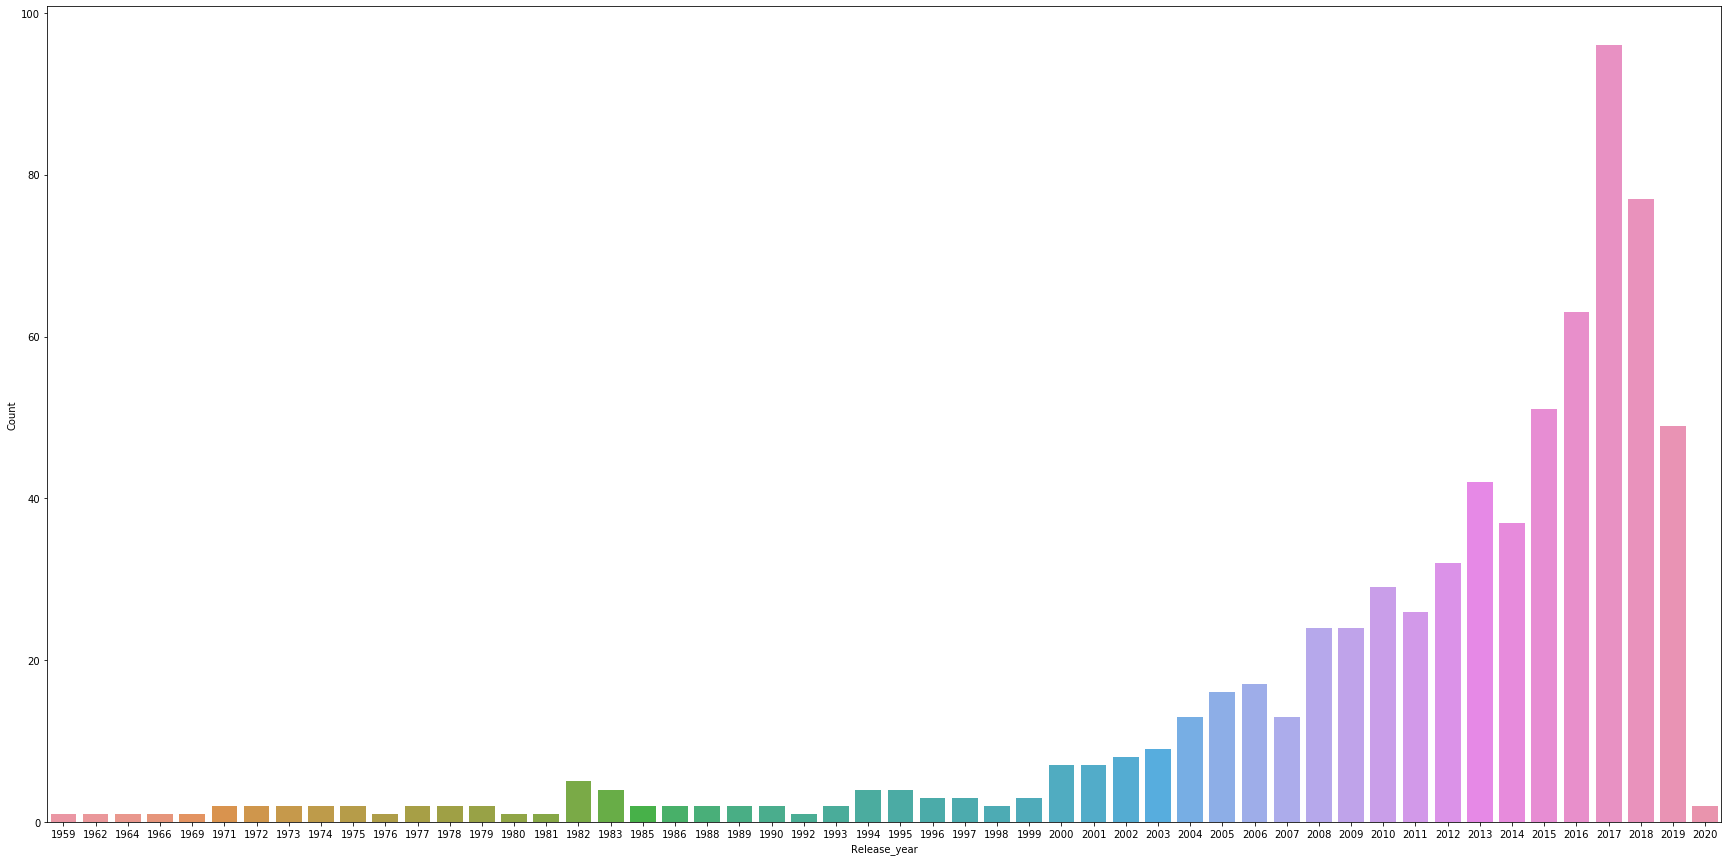

In [27]:
Year('country','India')

Let's move forward to country wise EDA

In [28]:
country = data['country']

In [29]:
count = country.str.split(',')

In [30]:
country = []
for countie in count:
    for c in countie:
        country.append(c)

In [31]:
df = pd.DataFrame(data=country,columns=['Country'])

In [32]:
df = df['Country'].value_counts()
df = pd.DataFrame(df)
df['Count'] = df['Country']
df['Country'] = df.index
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,Country,Count
0,United States,1505
1,India,737
2,United Kingdom,253
3,United States,213
4,Canada,114
...,...,...
149,Dominican Republic,1
150,Kenya,1
151,Malawi,1
152,Sri Lanka,1


In [33]:
df[df['Country']=='India']

,Country,Count
1,India,737


In [34]:
data['country'].values

array(['United States, India, South Korea, China', 'United States',
       'Bulgaria, United States, Spain, Canada', ...,
       'India, United States', 'South Korea', 'Turkey'], dtype=object)

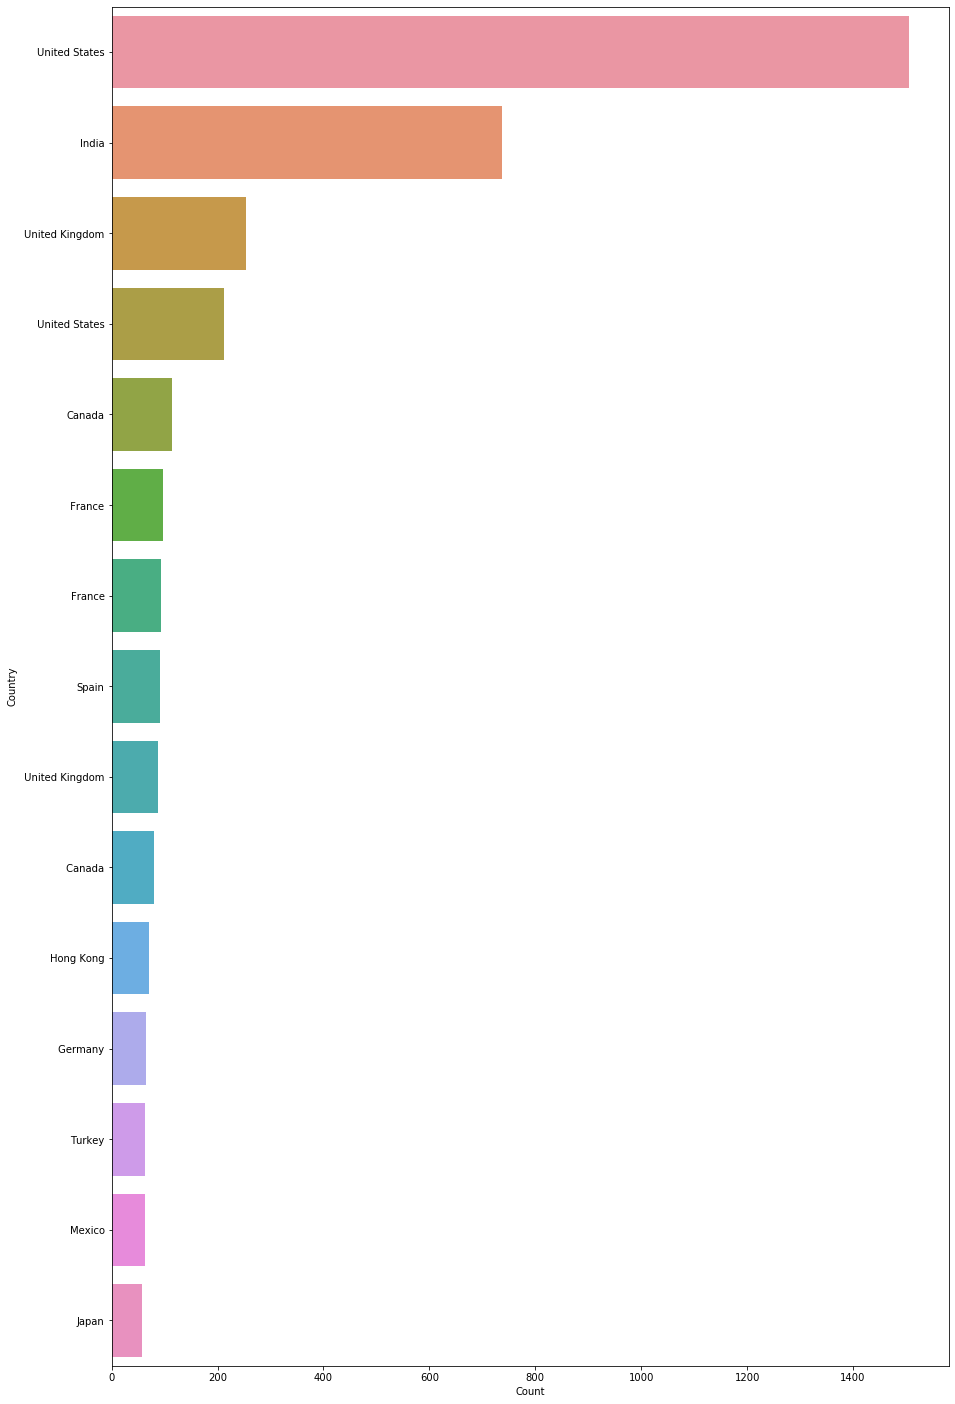

In [35]:
plt.figure(figsize=(15,25))
# plt.xlim(2000)
sns.barplot(data=df[df['Count']>50],x='Count',y='Country')

United States, India and United Kingdom are countries with highest movies/Tv shows released on. Above chart was for countries having Movies/TV shows more than 50 count. And below graph represents Movies/TV shows with less than 50 count of items.

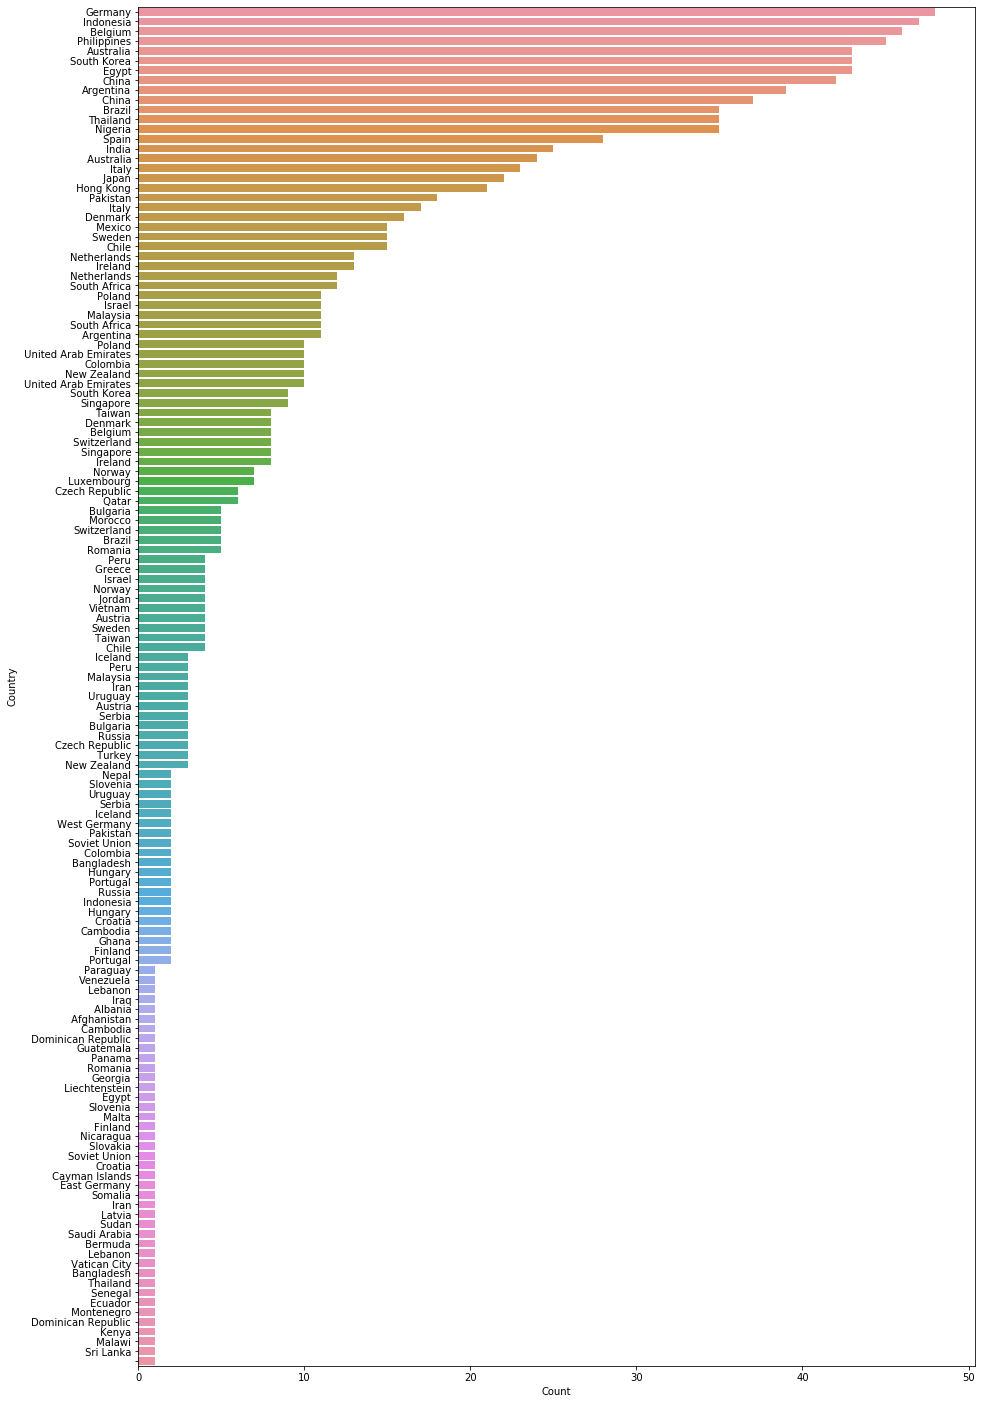

In [36]:
plt.figure(figsize=(15,25))
# plt.xlim(2000)
sns.barplot(data=df[df['Count']<50],x='Count',y='Country')

Lets check how many movies and TV shows are there in total.

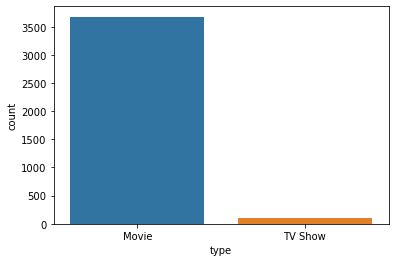

In [37]:
sns.countplot(data=data,x='type')

Netflix have more Movies than TV shows. Lets check rating and type distribution.

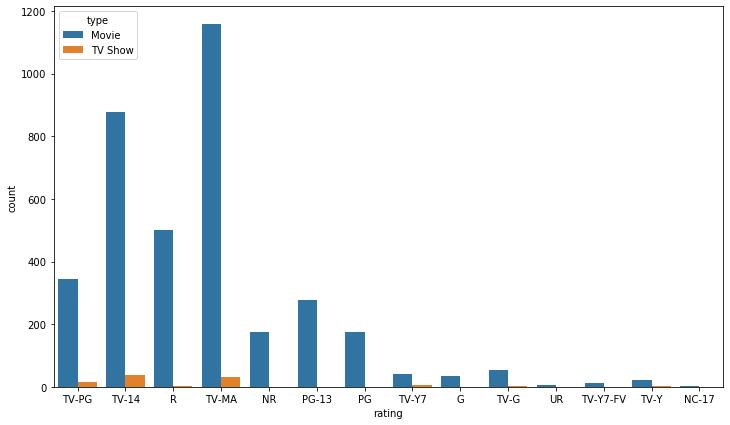

In [38]:
plt.figure(figsize=(12,7))
sns.countplot(data=data,x='rating',hue='type')

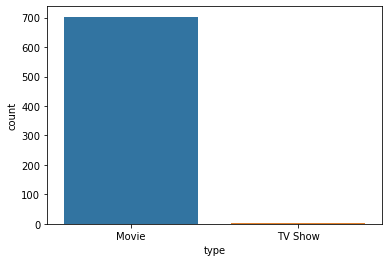

In [39]:
def Type(cat='all',arg='all'):
    if cat =='all' or arg =='all':
        sns.countplot(data=data,x='type')
    else:
        sns.countplot(data=data[data[cat]==arg],x='type')
Type('country','India')

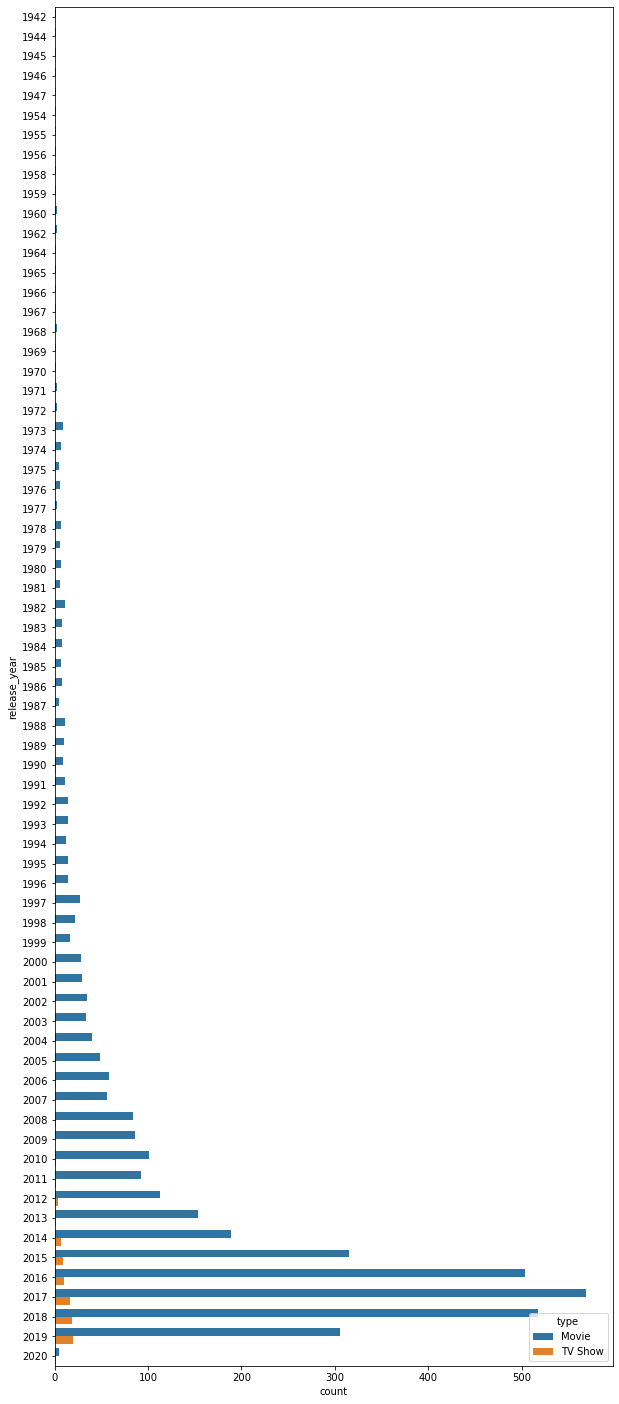

In [40]:
plt.figure(figsize=(10,25))
sns.countplot(data=data,y='release_year',hue='type')

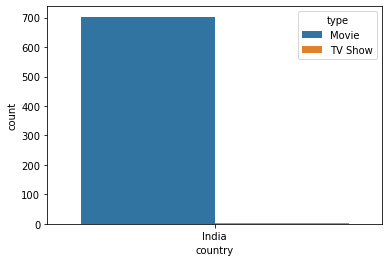

In [41]:

sns.countplot(data=data[data['country']=='India'],x='country',hue='type')

Let's see which director has more movies on netflix

In [42]:
df = data['director'].value_counts()
df.columns=['Director','count']
df = pd.DataFrame(df)
df['Count'] = df['director']
df['Director']=df.index
df.reset_index(inplace=True)
df.drop(['index','director'],axis=1,inplace=True)
df

,Count,Director
0,18,"Raúl Campos, Jan Suter"
1,13,Jay Karas
2,12,Jay Chapman
3,12,Marcus Raboy
4,9,Martin Scorsese
...,...,...
2915,1,Emanuel Hoss-Desmarais
2916,1,"Joel Coen, Ethan Coen"
2917,1,"Dylan Haegens, Bas van Teylingen"
2918,1,"Leung Lok Man, Luk Kim-ching"


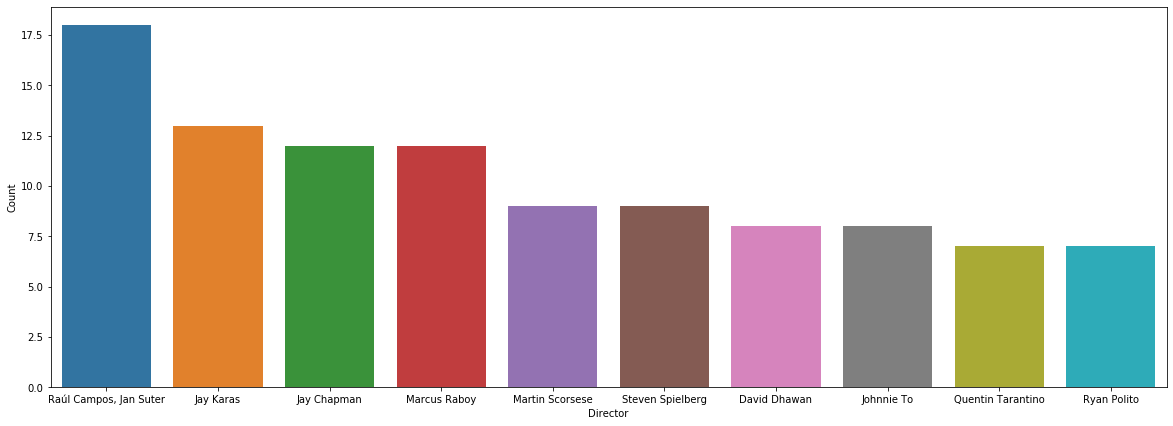

In [43]:
plt.figure(figsize=(20,7))
sns.barplot(data=df[:10],x='Director',y='Count')

Common function for same to do analysis based on arguments we passed.

In [44]:
data['duration'].nunique()

184

In [45]:
data.duration

0          90 min
4          99 min
6         110 min
7          60 min
9          90 min
          ...    
6142    7 Seasons
6158    4 Seasons
6167    2 Seasons
6182    4 Seasons
6213    3 Seasons
Name: duration, Length: 3774, dtype: object

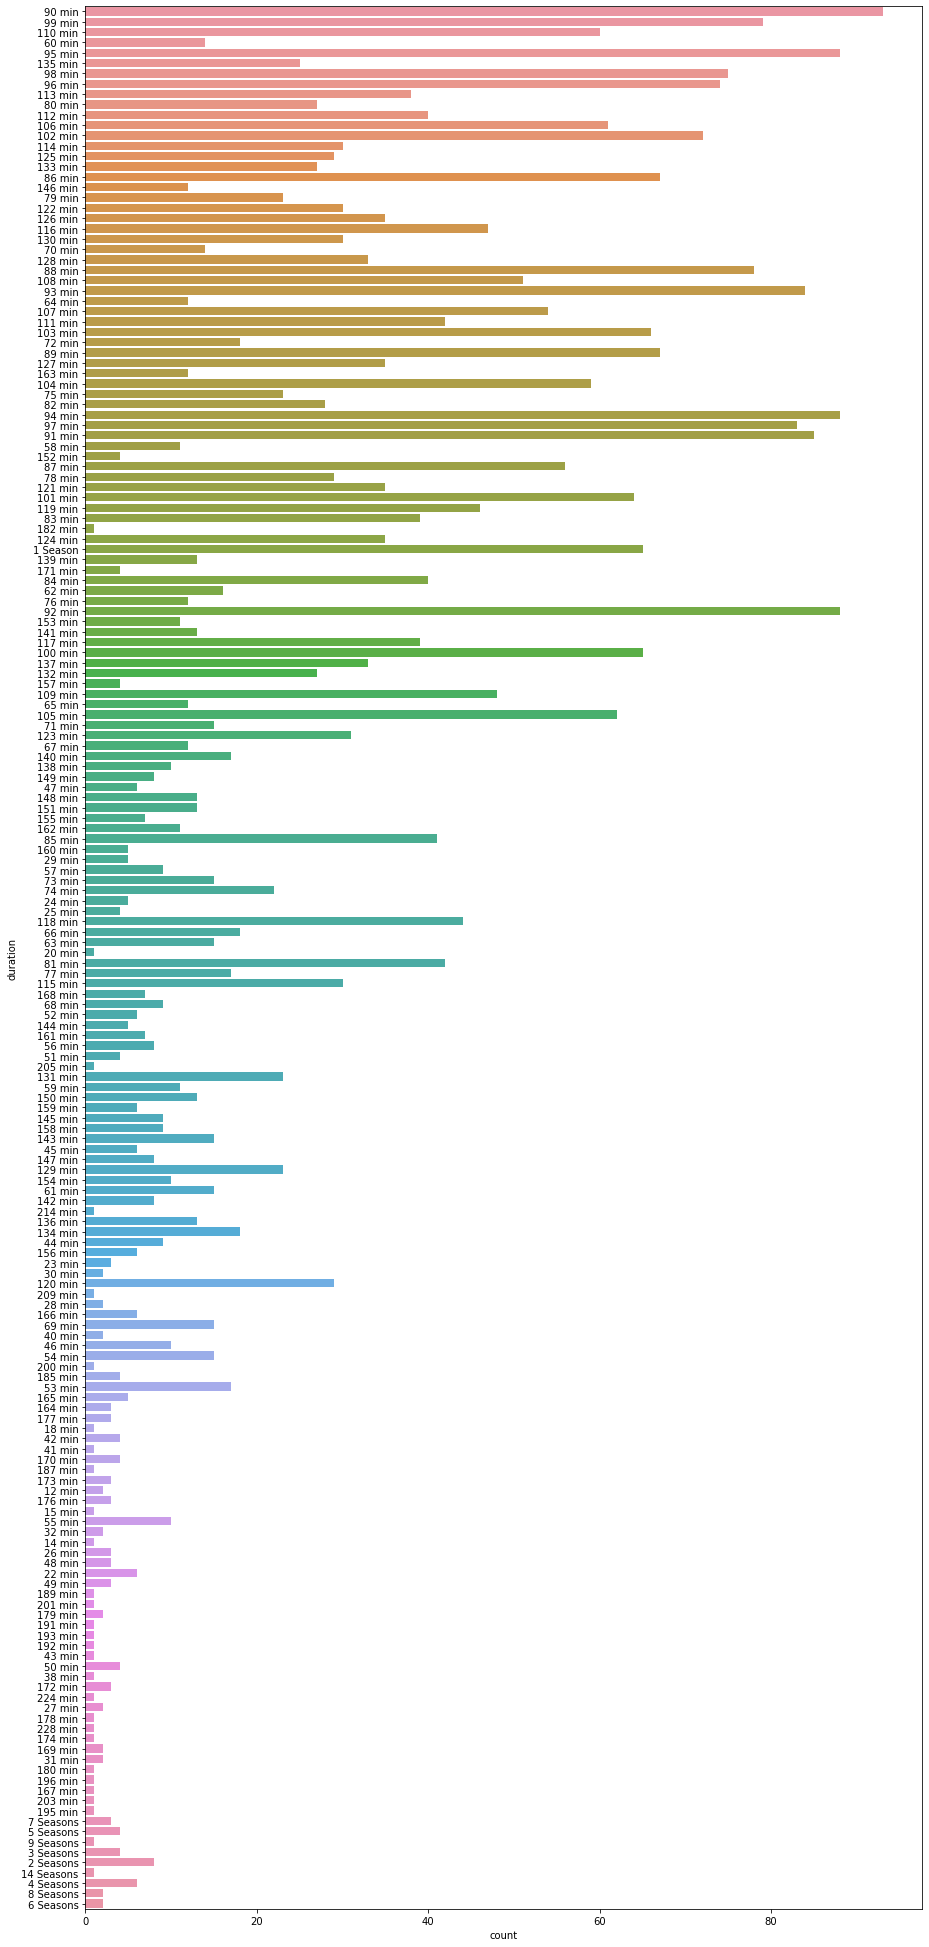

In [46]:
plt.figure(figsize=(15,35))
sns.countplot(data=data,y='duration')

In [47]:
tv=data[data['type']=='TV Show']

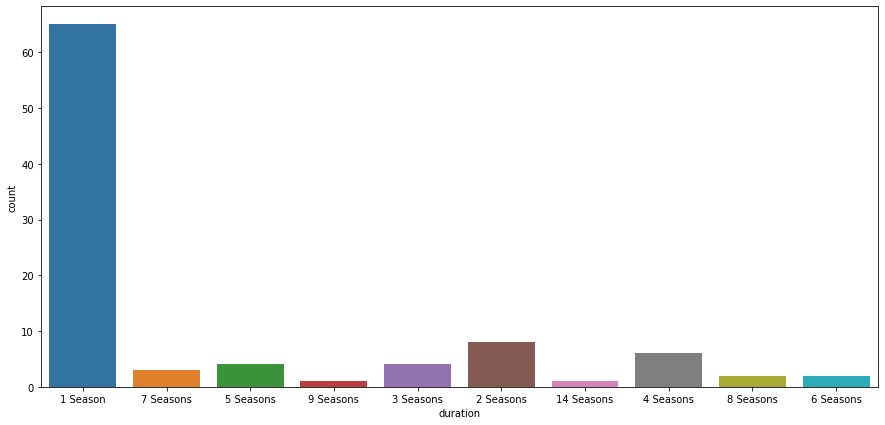

In [48]:
plt.figure(figsize=(15,7))
sns.countplot(data=tv,x='duration')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3774 non-null   int64 
 1   type          3774 non-null   object
 2   title         3774 non-null   object
 3   director      3774 non-null   object
 4   cast          3774 non-null   object
 5   country       3774 non-null   object
 6   date_added    3774 non-null   object
 7   release_year  3774 non-null   int64 
 8   rating        3774 non-null   object
 9   duration      3774 non-null   object
 10  listed_in     3774 non-null   object
 11  description   3774 non-null   object
dtypes: int64(2), object(10)
memory usage: 543.3+ KB


In [50]:
data['cast'].nunique()

3667

In [51]:
casts = data['cast'].str.split(',')

In [52]:
actors = []
for cast in casts:
    for actor in cast:
        actors.append(actor)

In [53]:
df = pd.DataFrame(actors,columns=['Actor'])
df = df['Actor'].value_counts()
df = pd.DataFrame(df)
df['Count'] = df['Actor']
df['Actor'] = df.index
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,Actor,Count
0,Anupam Kher,29
1,Om Puri,25
2,Boman Irani,23
3,Shah Rukh Khan,23
4,Paresh Rawal,22
...,...,...
20111,Marla Gibbs,1
20112,David Cross,1
20113,Ruby,1
20114,Tyrone Keogh,1


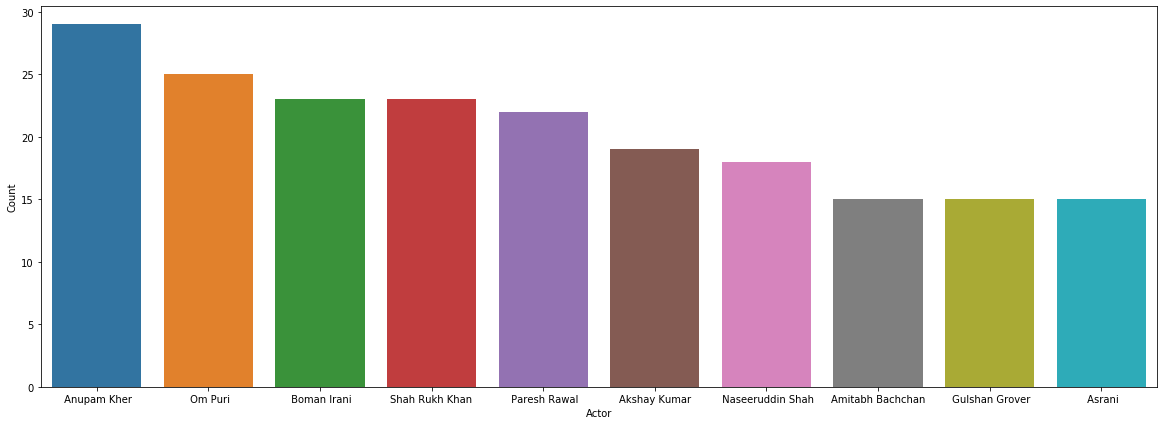

In [54]:
plt.figure(figsize=(20,7))
sns.barplot(data=df[:10],x='Actor',y='Count')

uhm, Seems like Bollywood actors have more movies on netflix than other film industry.

## End Note:

This was some basic over view of EDA. We got some insights which are amazing. Please do share your valuable comments. I know there is little less explanation of some stuff. And, please do tell in comments if you want some details in this and part 2 of EDA in the same dataset. If you enjoy reading this please upvote it. Thank you :)